In [1]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch
from kan import *

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,5,2], grid=5, k=3, seed=0)

In [2]:
import pandas as pd

# 读取xlsx文件
file_path = 'D:\OneDrive - Officials\OneDrive - Mraz Cindy\done\毕设资料\计算公式说明\数据库.xlsx'  # 替换为你的xlsx文件路径
df = pd.read_excel(file_path, engine='openpyxl')

# 显示数据
print(df)


      序号   流速  D/h  翅片长度  翅片角度      涡流因子      湍流强度
0      1  0.5    1   5.1    20  0.086126  0.048330
1      2  0.5    4   5.1    20  0.042124  0.038711
2      3  0.5   10   5.1    20  0.031135  0.038277
3      4  0.5    1   5.1    21  0.093988  0.025422
4      5  0.5    4   5.1    21  0.046767  0.021133
..   ...  ...  ...   ...   ...       ...       ...
379  380  5.0    4   5.1    34  0.072160  0.342456
380  381  5.0   10   5.1    34  0.060467  0.297741
381  382  5.0    1   5.1    35  0.149605  0.390288
382  383  5.0    4   5.1    35  0.076762  0.349103
383  384  5.0   10   5.1    35  0.059155  0.299603

[384 rows x 7 columns]


In [3]:
# 提取第2，3，4，5列的数据
input = df.iloc[:, 1:5]
output = df.iloc[:, 5:7]
test_input = df.iloc[20:30, 1:5]
test_label = df.iloc[20:30, 5:7]
# 将DataFrame转换为numpy数组并调整其维度为4
array1 = input.to_numpy()
array2 = output.to_numpy()
array3 = test_input.to_numpy()
array4 = test_label.to_numpy()
input=torch.tensor(array1, dtype=torch.float32)
ouput=torch.tensor(array2, dtype=torch.float32)
test_input=torch.tensor(array3, dtype=torch.float32)
test_label=torch.tensor(array4, dtype=torch.float32)
#test_input=torch.tensor([[1,4,5.1,26.5]], dtype=torch.float32)
dataset={'train_input':input,'test_input':test_input,'train_label':ouput,'test_label':test_label}

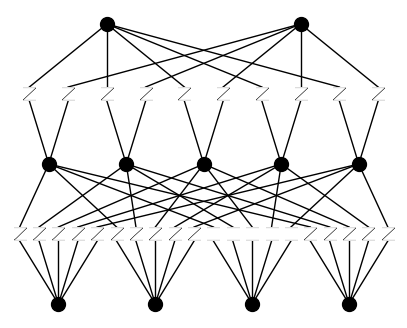

In [4]:
model(input)
model.plot(beta=100)

### model.train函数介绍
这个函数的文档解释了`training`函数的各个参数。以下是对每个参数的详细解释：

1. `dataset` : `dict`
    - 包含训练和测试数据集，字典结构如下：
        - `dataset['train_input']`: 训练输入数据
        - `dataset['train_label']`: 训练标签数据
        - `dataset['test_input']`: 测试输入数据
        - `dataset['test_label']`: 测试标签数据

2. `opt` : `str`
    - 优化器类型，值可以是 "LBFGS" 或 "Adam"，决定了使用的优化算法。

3. `steps` : `int`
    - 训练步骤数，表示训练过程中的总步数。

4. `log` : `int`
    - 日志记录频率，表示每隔多少步记录一次日志信息。

5. `lamb` : `float`
    - 总体惩罚强度系数，用于正则化项的总体惩罚。

6. `lamb_l1` : `float`
    - L1惩罚强度系数，用于稀疏化正则化。

7. `lamb_entropy` : `float`
    - 熵惩罚强度系数，用于熵正则化。

8. `lamb_coef` : `float`
    - 系数大小惩罚强度系数，用于控制系数大小的正则化。

9. `lamb_coefdiff` : `float`
    - 相邻系数差异（平滑性）惩罚强度系数，用于控制相邻系数差异的正则化。

10. `update_grid` : `bool`
    - 是否定期更新网格。如果为 `True`，则在特定步骤前定期更新网格。

11. `grid_update_num` : `int`
    - 在停止网格更新步骤之前，网格更新的次数。

12. `stop_grid_update_step` : `int`
    - 在此步骤之后不再更新网格。

13. `batch` : `int`
    - 批量大小。如果值为 -1，则使用整个数据集进行训练（即全量批次）。

14. `small_mag_threshold` : `float`
    - 确定大小数的阈值（可能对小数施加较大的惩罚）。

15. `small_reg_factor` : `float`
    - 对小因子相对于大因子的惩罚强度。

16. `device` : `str`
    - 计算设备，例如 "cpu" 或 "cuda"（用于指定运行训练的硬件设备）。

17. `save_fig_freq` : `int`
    - 每隔多少步保存一次图像。

这些参数共同定义了训练过程中的数据、优化策略、正则化方法、批量处理方式以及日志记录和图像保存的频率。

train loss: 2.43e-01 | test loss: 3.19e-01 | reg: 3.71e+02 : 100%|█| 100/100 [00:03<00:00, 27.35it/s


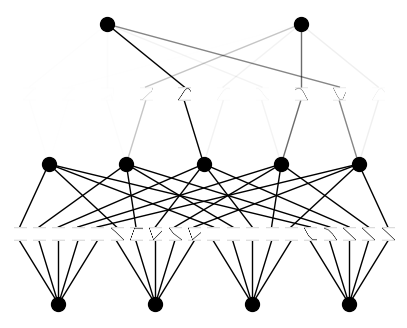

In [5]:
# train the model
model.train(dataset, opt="Adam", steps=100, lamb=0.01, lamb_entropy=10.);
model.plot(beta=100)

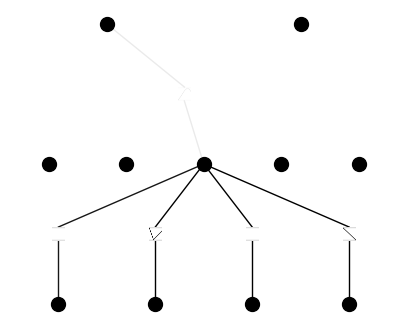

In [6]:
model.prune()
model.plot(mask=True)

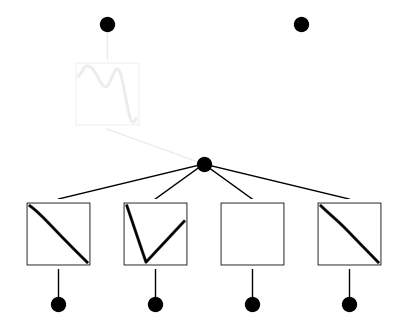

In [7]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [8]:
model.train(dataset, opt="LBFGS", steps=50)

train loss: 2.21e-02 | test loss: 1.69e-02 | reg: 6.99e+04 : 100%|██| 50/50 [00:06<00:00,  7.74it/s]


{'train_loss': [array(0.06722111, dtype=float32),
  array(0.06631227, dtype=float32),
  array(0.06430137, dtype=float32),
  array(0.06205042, dtype=float32),
  array(0.05469691, dtype=float32),
  array(0.04142583, dtype=float32),
  array(0.03477631, dtype=float32),
  array(0.03302412, dtype=float32),
  array(0.02750255, dtype=float32),
  array(0.02699175, dtype=float32),
  array(0.02727924, dtype=float32),
  array(0.02631878, dtype=float32),
  array(0.02594687, dtype=float32),
  array(0.02578996, dtype=float32),
  array(0.02552752, dtype=float32),
  array(0.02621356, dtype=float32),
  array(0.02596659, dtype=float32),
  array(0.02587495, dtype=float32),
  array(0.02559856, dtype=float32),
  array(0.02545272, dtype=float32),
  array(0.02653226, dtype=float32),
  array(0.02580016, dtype=float32),
  array(0.02543544, dtype=float32),
  array(0.02530813, dtype=float32),
  array(0.02503245, dtype=float32),
  array(0.02515422, dtype=float32),
  array(0.02466736, dtype=float32),
  array(0.0242

In [9]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with abs, r2=0.0
fixing (0,1,0) with sin, r2=1.0000003576278687
fixing (0,2,0) with abs, r2=0.0
fixing (0,3,0) with sin, r2=0.9993739724159241
fixing (1,0,0) with sin, r2=0.9778960347175598
fixing (1,0,1) with sin, r2=0.9914510846138


In [10]:
model.train(dataset, opt="LBFGS", steps=50)

train loss: 2.41e-02 | test loss: 2.02e-02 | reg: 6.87e+04 : 100%|██| 50/50 [00:04<00:00, 11.92it/s]


{'train_loss': [array(0.03098641, dtype=float32),
  array(0.02920429, dtype=float32),
  array(0.02733132, dtype=float32),
  array(0.02647466, dtype=float32),
  array(0.02550258, dtype=float32),
  array(0.02425338, dtype=float32),
  array(0.0241358, dtype=float32),
  array(0.02413535, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413534, dtype=float32),
  array(0.02413

In [11]:
model.auto_symbolic(lib=['exp','sin','x^2','x^3','x^4','log','sqrt','tanh','abs','x'])
model.train(dataset, opt='LBFGS', steps=50, lamb=0.00, update_grid=False)
model.symbolic_formula()

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,3,0) since already symbolic
skipping (1,0,0) since already symbolic
skipping (1,0,1) since already symbolic


train loss: 2.40e-02 | test loss: 1.98e-02 | reg: 6.87e+04 : 100%|██| 50/50 [00:01<00:00, 26.04it/s]


([0.05 - 0.04*sin(60.2*sin(2.76*x_2 + 5.76) + 0.01*sin(0.72*x_4 - 2.9) + 0.02*Abs(10.0*x_1 + 10.0) - 0.02*Abs(10.0*x_3 + 10.0) + 359.96),
  0.56 - 0.53*sin(45.03*sin(2.76*x_2 + 5.76) + 0.01*sin(0.72*x_4 - 2.9) + 0.02*Abs(10.0*x_1 + 10.0) - 0.02*Abs(10.0*x_3 + 10.0) + 262.69)],
 [x_1, x_2, x_3, x_4])

In [12]:
model.symbolic_formula(floating_digit=4)

([0.0542 - 0.0421*sin(60.1977*sin(2.763*x_2 + 5.7611) + 0.0121*sin(0.7205*x_4 - 2.8955) + 0.023*Abs(9.9997*x_1 + 9.9999) - 0.0218*Abs(9.9984*x_3 + 9.9997) + 359.956),
  0.5583 - 0.5271*sin(45.0255*sin(2.763*x_2 + 5.7611) + 0.009*sin(0.7205*x_4 - 2.8955) + 0.0172*Abs(9.9997*x_1 + 9.9999) - 0.0163*Abs(9.9984*x_3 + 9.9997) + 262.6852)],
 [x_1, x_2, x_3, x_4])